<a href="https://colab.research.google.com/github/reolingovender/MIT805/blob/main/Pricing_Sensitivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00


In [2]:
import datasets
from datasets import load_dataset
import numpy as np
import pandas as pd

In [3]:
datasets.logging.set_verbosity_error()
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [4]:
df = pd.DataFrame(dataset['full'])

In [5]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [6]:
datasets.logging.set_verbosity_error()
dataset_meta = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", trust_remote_code=True)

meta_All_Beauty.jsonl:   0%|          | 0.00/213M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [7]:
df_meta = pd.DataFrame(dataset_meta['full'])

In [16]:
df_meta[df_meta['parent_asin'] == "B081TJ8YS3"]

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
32194,All Beauty,All Natural Vegan Dry Shampoo Powder - Eco Fri...,4.0,56,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Easy to apply!'], 'url': ['https:/...",Two Goats Apothecary,[],"{""Brand"": ""Two Goats Apothecary"", ""Item Form"":...",B081TJ8YS3,None,None,None


In [8]:
merged_df = pd.merge(df, df_meta[['parent_asin', 'price']], on='parent_asin')
merged_df = merged_df[merged_df['price'] != "None"]

In [26]:
merged_df.head(200)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,price
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,21.98
5,4.0,Pretty Color,The polish was quiet thick and did not apply s...,"[{'attachment_type': 'IMAGE', 'large_image_url...",B00R8DXL44,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1598567408138,0,True,7.1
12,3.0,Just ok,I try to get Keratin treatments every 3 months...,[],B07SLFWZKN,B07SLFWZKN,AFSKPY37N3C43SOI5IEXEK5JSIYA,1619737501209,0,False,49.95
24,5.0,You won’t regret this purchase.,Got my new eyebrows in mail today. Magically ...,[],B07ZJKVVLW,B07ZJKVVLW,AHPUT3ITXCHQJO7OMF74LEMYHIVA,1578611984772,430,True,7.99
30,2.0,Ineffective,A total waste of money. I get better results ...,[],B083BDVS36,B083BDVS36,AHZ6XMOLEWA67S3TX7IWEXXGWSOA,1621356942148,0,True,9.99
...,...,...,...,...,...,...,...,...,...,...,...
894,3.0,Made for people with thick hair!,I am totally disappointed with this headband. ...,[],B00RIT53JO,B00RIT53JO,AGVXN42IKSKKBNVFGKCMKIZEBNSQ,1446509148000,0,True,3.49
905,5.0,Great deal,Love this scent ... soft and long lasting when...,[],B01FS5PJNE,B01FS5PJNE,AHU45NZTYUKII5KWB47OI5NH3QLQ,1571930076040,0,True,17.95
927,5.0,Very helpful product,I use these to get myself extra clean after us...,[],B073T51X3V,B073T51X3V,AHUKDCTHM6YIDIY7CDZMXBF2NU5Q,1603766626713,1,True,16.95
930,4.0,I got this for my son who is obsessed with ...,I got this for my son who is obsessed with my ...,[],B00KLD1R3K,B0C3LVTX2V,AGDFLGBDHOLOASHN4K6ICKMAWEOA,1476168243000,3,True,19.98


In [33]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=ce37cf4e2c69daf742a665488db16bbeda78abea9f6a5f9feca64f32391cbf12
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [36]:
# Initialize Spark session
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

spark = SparkSession.builder.appName("ResourceOptimizedSession").getOrCreate()
pyspark_df = spark.createDataFrame(merged_df[['parent_asin', 'rating', 'price']])

In [42]:
grouped_df = pyspark_df.groupby(['parent_asin', 'price']).mean().withColumnRenamed("avg(rating)", "avg_rating")

In [44]:
avg_rating = grouped_df.select('avg_rating').rdd.flatMap(lambda x: x).collect()
price = grouped_df.select('price').rdd.flatMap(lambda x: x).collect()

In [45]:
x = price
y = avg_rating

# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

In [46]:
from matplotlib import pyplot as plt

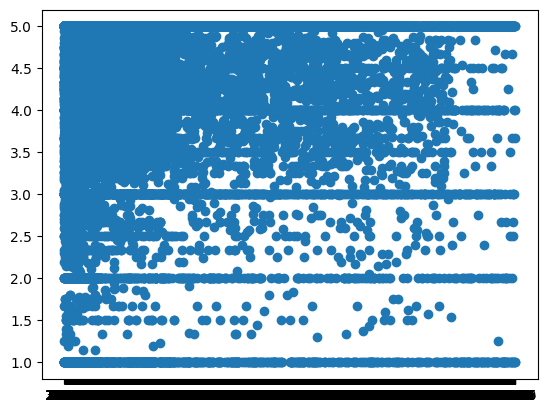

In [47]:
plt.scatter(x,y)